# **Multilinear Regression**

Multilinear Regression (MLR) is an extension of simple linear regression. It models the relationship between multiple independent variables (predictors) and a dependent variable (target). It assumes that the dependent variable is a linear combination of the independent variables.

Equation
The equation for a multilinear regression model is:

$$y=β 
1
​
 x 
1
​
 +β 
2
​
 x 
2
​
 +⋯+β 
n
​
 x 
n
​
 +ϵ$$

Where:

$$


$$ y = m1x1 + m2x2 ...... + b$$

- $y: Dependent variable (target)$

- $β 
0
​
 : Intercept (value of 
𝑦
y when all 
𝑥
𝑖
=
0
x 
i
​
 =0)$

- $β 
i
​
 : Coefficients of independent variables 
𝑥
𝑖
x 
i
​
  (weights for each predictor)$

- $x 
i
​
 : Independent variables (features)$


## Assumptions of Multilinear Regression
For MLR to provide reliable results, certain assumptions must hold:


- Linearity: The relationship between predictors and the target variable is linear.

- Independence: Observations are independent of each other.

- Homoscedasticity: Constant variance of errors (
𝜖) across all levels of the independent variables.

- No Multicollinearity: Independent variables are not highly correlated with each other.

- Normality of Errors: Residuals (errors) should be normally distributed.

---

## Creating our own Dataset

In [36]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for multi-linear regression
n_samples = 200

# Features
X1 = np.random.uniform(0, 10, n_samples)  # Feature 1: Random values between 0 and 10
X2 = np.random.uniform(20, 50, n_samples)  # Feature 2: Random values between 20 and 50
X3 = np.random.uniform(5, 15, n_samples)  # Feature 3: Random values between 5 and 15

# Noise
noise = np.random.normal(0, 1, n_samples)  # Random noise

# Target variable (dependent variable) with known coefficients
y = 3.5 * X1 + 2.1 * X2 - 1.8 * X3 + noise

# Create a DataFrame
data = pd.DataFrame({
    'Feature1': X1,
    'Feature2': X2,
    'Feature3': X3,
    'Target': y
})

# Save to a CSV file
data_path = "data/multi_linear_regression_dataset.csv"
# data.to_csv(data_path, index=False)

data_path

'data/multi_linear_regression_dataset.csv'

----

In [37]:
_

'data/multi_linear_regression_dataset.csv'

---

In [38]:
from sklearn.datasets import make_regression
import plotly.express as px
import plotly.graph_objects as go

X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [39]:
df

,feature1,feature2,target
0,1.014370,1.665474,99.580516
1,2.632382,-0.949399,259.168214
2,-0.096060,2.560085,37.773233
3,0.982691,0.256030,129.149281
4,-0.543425,-0.032753,-80.464043
...,...,...,...
95,0.972554,0.632408,176.781187
96,0.681501,-0.039555,-10.343731
97,1.754794,-1.280429,288.997841
98,0.196555,1.446978,-82.522415


In [ ]:
# pip install nbformat>=4.2.0 -q

Note: you may need to restart the kernel to use updated packages.


In [41]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()

### **Random seed**
A random seed is a value used to initialize a pseudorandom number generator (PRNG). Pseudorandom number generators produce sequences of numbers that appear random but are actually deterministic, meaning that the same sequence will be generated every time if the generator is initialized with the same seed.

By setting a seed, you ensure that the same random numbers are generated every time the code is executed. This is critical in research, debugging, and sharing results.

### Applications of Random Seeds
- Machine Learning and Data Science

    Train-Test Splitting: Ensures the same split every time for consistent model evaluation.
    ```python
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    ```


----

### Importing Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Reimport necessary libraries due to code execution state reset
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 500

# Generate dataset
data = {
    "Experience_Years": np.random.randint(1, 21, size=num_samples),  # Years of experience
    "Education_Level": np.random.choice(["High School", "Bachelor's", "Master's", "PhD"], size=num_samples, p=[0.2, 0.5, 0.2, 0.1]),
    "Age": np.random.randint(22, 60, size=num_samples),  # Age of the person
    "Job_Role": np.random.choice(["Analyst", "Engineer", "Manager", "Executive"], size=num_samples, p=[0.4, 0.3, 0.2, 0.1]),
    "Work_Hours_per_Week": np.random.randint(30, 60, size=num_samples),  # Weekly work hours
    "Annual_Income": np.random.randint(30000, 120000, size=num_samples),  # Annual income in USD
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numeric for regression purposes
df["Education_Level"] = df["Education_Level"].map({
    "High School": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "PhD": 4
})

df["Job_Role"] = df["Job_Role"].map({
    "Analyst": 1,
    "Engineer": 2,
    "Manager": 3,
    "Executive": 4
})

# Add a dependent variable (Target)
# Hypothetical formula for generating income based on other variables
df["Salary"] = (
    2000 * df["Experience_Years"] + 
    3000 * df["Education_Level"] +
    500 * (df["Work_Hours_per_Week"] / 40) +
    np.random.normal(0, 5000, size=num_samples)  # Adding noise for variability
)

df.head()


,Experience_Years,Education_Level,Age,Job_Role,Work_Hours_per_Week,Annual_Income,Salary
0,7,4,30,2,50,97843,28084.308810
1,20,2,43,2,32,69901,50897.324856
2,15,3,25,2,55,41205,49490.956361
3,11,3,47,1,59,85661,37374.291216
4,8,3,50,1,52,35906,23410.427602


In [44]:
df

,Experience_Years,Education_Level,Age,Job_Role,Work_Hours_per_Week,Annual_Income,Salary
0,7,4,30,2,50,97843,28084.308810
1,20,2,43,2,32,69901,50897.324856
2,15,3,25,2,55,41205,49490.956361
3,11,3,47,1,59,85661,37374.291216
4,8,3,50,1,52,35906,23410.427602
...,...,...,...,...,...,...,...
495,5,2,58,1,37,67772,14267.470246
496,3,2,25,4,34,88478,20812.314652
497,11,3,49,2,57,94353,29250.269628
498,11,2,41,2,45,56762,28641.537721


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experience_Years     500 non-null    int32  
 1   Education_Level      500 non-null    int64  
 2   Age                  500 non-null    int32  
 3   Job_Role             500 non-null    int64  
 4   Work_Hours_per_Week  500 non-null    int32  
 5   Annual_Income        500 non-null    int32  
 6   Salary               500 non-null    float64
dtypes: float64(1), int32(4), int64(2)
memory usage: 19.7 KB


In [46]:
numerical_col = [col for col in df.columns if df[col].dtype == np.dtype(int) or df[col].dtype == np.dtype(float)]
numerical_col

['Education_Level', 'Job_Role', 'Salary']

In [47]:
# Load your dataset (assuming linear_data is the DataFrame)
correlation_matrix = df[numerical_col].corr()

# Display the correlation matrix
print(correlation_matrix)

                 Education_Level  Job_Role    Salary
Education_Level         1.000000 -0.046676  0.201492
Job_Role               -0.046676  1.000000 -0.066596
Salary                  0.201492 -0.066596  1.000000


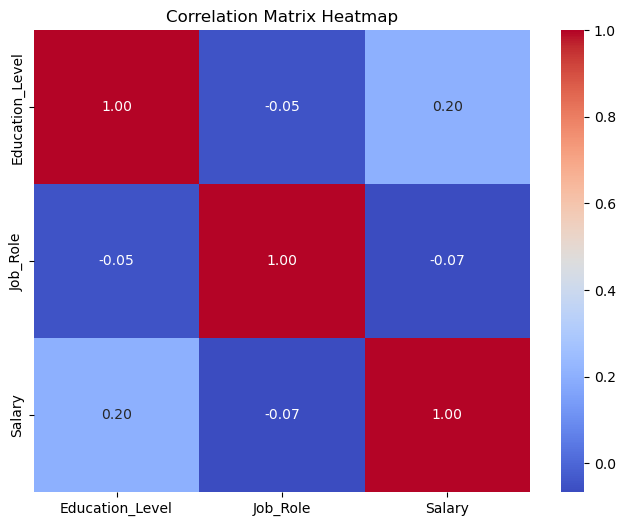

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [49]:
df.columns

Index(['Experience_Years', 'Education_Level', 'Age', 'Job_Role',
       'Work_Hours_per_Week', 'Annual_Income', 'Salary'],
      dtype='object')

In [50]:
X = df[['Experience_Years', "Education_Level"]]
y = df['Salary']

In [51]:
X

,Experience_Years,Education_Level
0,7,4
1,20,2
2,15,3
3,11,3
4,8,3
...,...,...
495,5,2
496,3,2
497,11,3
498,11,2


In [52]:
y

0      28084.308810
1      50897.324856
2      49490.956361
3      37374.291216
4      23410.427602
           ...     
495    14267.470246
496    20812.314652
497    29250.269628
498    28641.537721
499    42066.221247
Name: Salary, Length: 500, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train,y_train)

LinearRegression()

In [56]:
X_test

,Experience_Years,Education_Level
130,13,2
291,5,2
37,9,1
239,8,1
191,16,4
...,...,...
367,1,1
302,8,2
175,1,2
348,4,3


In [57]:
y_pred = model.predict(X_test)

In [58]:
y_test

130    31506.195644
291     8730.751335
37     26630.332801
239    22322.863140
191    41095.185956
           ...     
367     6214.046604
302    29556.048731
175     1374.821183
348    23761.867849
356    36373.682992
Name: Salary, Length: 100, dtype: float64

In [59]:
y_pred

array([32203.47793426, 16411.11659198, 21230.16594561, 19256.12077783,
       44279.87607264, 30229.43276648, 49098.92542627, 12463.02625641,
        8514.93592084, 19488.2479095 , 43176.78992291,  8514.93592084,
       15308.03044226, 14437.0714242 , 22333.25209534, 30229.43276648,
       25410.38341285, 11592.06723836, 34177.52310205, 24307.29726312,
       36151.56826983, 32203.47793426, 17282.07561004, 22333.25209534,
       36151.56826983, 50202.011576  , 42944.66279124, 35280.60925177,
       36151.56826983, 32203.47793426, 30229.43276648, 36383.6954015 ,
       30229.43276648, 30461.55989815, 12463.02625641, 41202.74475513,
       32203.47793426,  8514.93592084, 28255.38759869, 44047.74894097,
       50202.011576  , 25410.38341285, 45150.8350907 , 47124.88025848,
       45150.8350907 , 46021.79410876, 18385.16175977, 17514.20274171,
       41202.74475513, 36383.6954015 , 18385.16175977, 41202.74475513,
       25178.25628118, 34409.65023372, 16411.11659198, 32435.60506593,
      

In [60]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 4151.0225974273335
MSE 27539518.18529861
R2 score 0.8447518849292224


In [61]:
model.coef_

array([1974.04516778, 3077.13131751])

In [62]:
model.intercept_

np.float64(386.62811803363365)